<a href="https://colab.research.google.com/github/wasiq921/Task-1-Beginner-Level---LGM-VIP-AUGUST-2021/blob/main/Task_3_(BEGINNER_LEVEL_TASK)_LGM_VIP_AUGUST_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3 Music Recommendation

### Music recommender system can suggest songs to users based on their listening pattern.

## Author: Muhammad Wasiq
##LGM VIP AUGUST 2021


In [ ]:
#Connect Kaggle with Colab to Import Dataset
from google.colab import drive
drive.mount('/content/gdrive')




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

%cd /content/gdrive/My Drive/Kaggle

!kaggle competitions download -c kkbox-music-recommendation-challenge

/content/gdrive/My Drive/Kaggle
  0% 0.00/453k [00:00<?, ?B/s]
100% 453k/453k [00:00<00:00, 28.1MB/s]
 98% 99.0M/101M [00:00<00:00, 124MB/s]
100% 101M/101M [00:00<00:00, 123MB/s] 
 88% 87.0M/98.8M [00:00<00:00, 102MB/s] 
100% 98.8M/98.8M [00:01<00:00, 96.2MB/s]
 96% 97.0M/101M [00:00<00:00, 102MB/s]
100% 101M/101M [00:00<00:00, 109MB/s] 
 95% 40.0M/41.9M [00:00<00:00, 89.6MB/s]
100% 41.9M/41.9M [00:00<00:00, 84.6MB/s]
  0% 0.00/1.29M [00:00<?, ?B/s]
100% 1.29M/1.29M [00:00<00:00, 42.0MB/s]


In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('train.csv.7z').extractall("/content/gdrive/My Drive/Kaggle")
Archive('test.csv.7z').extractall("/content/gdrive/My Drive/Kaggle")

Archive('members.csv.7z').extractall("/content/gdrive/My Drive/Kaggle")

Archive('songs.csv.7z').extractall("/content/gdrive/My Drive/Kaggle")

     |████████████████████████████████| 77 kB 2.2 MB/s 


Successfully Connected Kaggle with Colab and imported and unzip dataset

Now we import all required libraries for our task

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [ ]:
train = pd.read_csv('train.csv')
test=pd.read_csv("test.csv")
members=pd.read_csv("members.csv")
songs=pd.read_csv("songs.csv")

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


Successfullly Imported all required dataset

In [ ]:
# 1% sample of items
train = train.sample(frac=0.01)

In [ ]:
train.shape

(73774, 6)

In [ ]:
train = pd.merge(train, songs, on='song_id', how='left')

In [ ]:
train.shape

(73774, 12)

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,w0GjwHIpsIXQeM/2wWGCPKaEfR339CzOHjp2yJ5kxXo=,dKfxhaRKwvhiYOUQ5JlkxQrJ/dDksdFueybCIdG5dXI=,my library,Local playlist more,local-library,1,205224.0,465,Various Artists,Rocoberry,Ji Hoon/GAEMI,31.0
1,asiRFkuBuPyUKPGB4v+iw5BCwFtRN2paj1tzvNGjF3c=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,my library,Local playlist more,local-library,0,346272.0,458,五月天 (Mayday),怪獸,阿信,3.0
2,k4FVXwOW+H6GP5GPklub7jE6bgX4E5Xg9uIxq+BI9iY=,wIyJy+rLR+bjPcVydq6r8sCRm5he7urtV5MsQI9sDak=,discover,Online playlist more,online-playlist,1,193375.0,444,Seohyun,Matthew Tishler| Felicia Barton,NaN,31.0
3,yanbsb+JxenTqCS2GEc6eGWYUSwnLiuIJVHZLagDbBE=,8IVZCbM67Y08IXGOh7L/xw6YlQUxC8qitkWB91D31WY=,radio,Radio,radio,0,307060.0,786|947,李欣芸 (CinCin Lee),李欣芸,NaN,-1.0
4,3WUnEKYdIe9wZA7HOVnlDaF2MKBvakc4qiIDbyw4d7w=,XkvpC4yaPtzNf95XHujV5rFi6T+irQ7jLW/A6sVXjdI=,my library,Local playlist more,local-playlist,1,280659.0,458,周杰倫 (Jay Chou),周杰倫,黃淩嘉,3.0


In [ ]:
train = pd.merge(train, members, on='msno', how='left')
train.shape
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,w0GjwHIpsIXQeM/2wWGCPKaEfR339CzOHjp2yJ5kxXo=,dKfxhaRKwvhiYOUQ5JlkxQrJ/dDksdFueybCIdG5dXI=,my library,Local playlist more,local-library,1,205224.0,465,Various Artists,Rocoberry,Ji Hoon/GAEMI,31.0,13,29,female,9,20110611,20171022
1,asiRFkuBuPyUKPGB4v+iw5BCwFtRN2paj1tzvNGjF3c=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,my library,Local playlist more,local-library,0,346272.0,458,五月天 (Mayday),怪獸,阿信,3.0,1,0,NaN,7,20140102,20171007
2,k4FVXwOW+H6GP5GPklub7jE6bgX4E5Xg9uIxq+BI9iY=,wIyJy+rLR+bjPcVydq6r8sCRm5he7urtV5MsQI9sDak=,discover,Online playlist more,online-playlist,1,193375.0,444,Seohyun,Matthew Tishler| Felicia Barton,NaN,31.0,13,55,male,3,20161016,20171020
3,yanbsb+JxenTqCS2GEc6eGWYUSwnLiuIJVHZLagDbBE=,8IVZCbM67Y08IXGOh7L/xw6YlQUxC8qitkWB91D31WY=,radio,Radio,radio,0,307060.0,786|947,李欣芸 (CinCin Lee),李欣芸,NaN,-1.0,22,27,female,9,20151204,20171223
4,3WUnEKYdIe9wZA7HOVnlDaF2MKBvakc4qiIDbyw4d7w=,XkvpC4yaPtzNf95XHujV5rFi6T+irQ7jLW/A6sVXjdI=,my library,Local playlist more,local-playlist,1,280659.0,458,周杰倫 (Jay Chou),周杰倫,黃淩嘉,3.0,6,28,female,9,20090120,20171001


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73774 entries, 0 to 73773
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    73774 non-null  object 
 1   song_id                 73774 non-null  object 
 2   source_system_tab       73502 non-null  object 
 3   source_screen_name      69587 non-null  object 
 4   source_type             73556 non-null  object 
 5   target                  73774 non-null  int64  
 6   song_length             73773 non-null  float64
 7   genre_ids               72569 non-null  object 
 8   artist_name             73773 non-null  object 
 9   composer                56976 non-null  object 
 10  lyricist                42129 non-null  object 
 11  language                73773 non-null  float64
 12  city                    73774 non-null  int64  
 13  bd                      73774 non-null  int64  
 14  gender                  44250 non-null

In [ ]:
#Now I will count Null Values in %
train.isnull().sum()/train.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.368694
source_screen_name         5.675441
source_type                0.295497
target                     0.000000
song_length                0.001355
genre_ids                  1.633367
artist_name                0.001355
composer                  22.769539
lyricist                  42.894516
language                   0.001355
city                       0.000000
bd                         0.000000
gender                    40.019519
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [ ]:
#Most of the Columns are Non Null but some Columns have Null Values, Now Remove Null Values from Columns
for i in train.select_dtypes(include=['object']).columns:
    train[i][train[i].isnull()] = 'unknown'
train = train.fillna(value=0)

In [ ]:
#Now I will count Null Values in %
train.isnull().sum()/train.isnull().count()*100

msno                      0.0
song_id                   0.0
source_system_tab         0.0
source_screen_name        0.0
source_type               0.0
target                    0.0
song_length               0.0
genre_ids                 0.0
artist_name               0.0
composer                  0.0
lyricist                  0.0
language                  0.0
city                      0.0
bd                        0.0
gender                    0.0
registered_via            0.0
registration_init_time    0.0
expiration_date           0.0
dtype: float64

There is no null value left in our dataset

Now Changing Date and Time Format

In [ ]:
# registration_init_time
train.registration_init_time = pd.to_datetime(train.registration_init_time, format='%Y%m%d', errors='ignore')
train['registration_init_time_year'] = train['registration_init_time'].dt.year
train['registration_init_time_month'] = train['registration_init_time'].dt.month
train['registration_init_time_day'] = train['registration_init_time'].dt.day

# expiration_date
train.expiration_date = pd.to_datetime(train.expiration_date,  format='%Y%m%d', errors='ignore')
train['expiration_date_year'] = train['expiration_date'].dt.year
train['expiration_date_month'] = train['expiration_date'].dt.month
train['expiration_date_day'] = train['expiration_date'].dt.day

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,w0GjwHIpsIXQeM/2wWGCPKaEfR339CzOHjp2yJ5kxXo=,dKfxhaRKwvhiYOUQ5JlkxQrJ/dDksdFueybCIdG5dXI=,my library,Local playlist more,local-library,1,205224.0,465,Various Artists,Rocoberry,Ji Hoon/GAEMI,31.0,13,29,female,9,2011-06-11,2017-10-22,2011,6,11,2017,10,22
1,asiRFkuBuPyUKPGB4v+iw5BCwFtRN2paj1tzvNGjF3c=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,my library,Local playlist more,local-library,0,346272.0,458,五月天 (Mayday),怪獸,阿信,3.0,1,0,unknown,7,2014-01-02,2017-10-07,2014,1,2,2017,10,7
2,k4FVXwOW+H6GP5GPklub7jE6bgX4E5Xg9uIxq+BI9iY=,wIyJy+rLR+bjPcVydq6r8sCRm5he7urtV5MsQI9sDak=,discover,Online playlist more,online-playlist,1,193375.0,444,Seohyun,Matthew Tishler| Felicia Barton,unknown,31.0,13,55,male,3,2016-10-16,2017-10-20,2016,10,16,2017,10,20
3,yanbsb+JxenTqCS2GEc6eGWYUSwnLiuIJVHZLagDbBE=,8IVZCbM67Y08IXGOh7L/xw6YlQUxC8qitkWB91D31WY=,radio,Radio,radio,0,307060.0,786|947,李欣芸 (CinCin Lee),李欣芸,unknown,-1.0,22,27,female,9,2015-12-04,2017-12-23,2015,12,4,2017,12,23
4,3WUnEKYdIe9wZA7HOVnlDaF2MKBvakc4qiIDbyw4d7w=,XkvpC4yaPtzNf95XHujV5rFi6T+irQ7jLW/A6sVXjdI=,my library,Local playlist more,local-playlist,1,280659.0,458,周杰倫 (Jay Chou),周杰倫,黃淩嘉,3.0,6,28,female,9,2009-01-20,2017-10-01,2009,1,20,2017,10,1


In [ ]:

# Changing Dates to category
train['registration_init_time'] = train['registration_init_time'].astype('category')
train['expiration_date'] = train['expiration_date'].astype('category')

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,w0GjwHIpsIXQeM/2wWGCPKaEfR339CzOHjp2yJ5kxXo=,dKfxhaRKwvhiYOUQ5JlkxQrJ/dDksdFueybCIdG5dXI=,my library,Local playlist more,local-library,1,205224.0,465,Various Artists,Rocoberry,Ji Hoon/GAEMI,31.0,13,29,female,9,2011-06-11,2017-10-22,2011,6,11,2017,10,22
1,asiRFkuBuPyUKPGB4v+iw5BCwFtRN2paj1tzvNGjF3c=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,my library,Local playlist more,local-library,0,346272.0,458,五月天 (Mayday),怪獸,阿信,3.0,1,0,unknown,7,2014-01-02,2017-10-07,2014,1,2,2017,10,7
2,k4FVXwOW+H6GP5GPklub7jE6bgX4E5Xg9uIxq+BI9iY=,wIyJy+rLR+bjPcVydq6r8sCRm5he7urtV5MsQI9sDak=,discover,Online playlist more,online-playlist,1,193375.0,444,Seohyun,Matthew Tishler| Felicia Barton,unknown,31.0,13,55,male,3,2016-10-16,2017-10-20,2016,10,16,2017,10,20
3,yanbsb+JxenTqCS2GEc6eGWYUSwnLiuIJVHZLagDbBE=,8IVZCbM67Y08IXGOh7L/xw6YlQUxC8qitkWB91D31WY=,radio,Radio,radio,0,307060.0,786|947,李欣芸 (CinCin Lee),李欣芸,unknown,-1.0,22,27,female,9,2015-12-04,2017-12-23,2015,12,4,2017,12,23
4,3WUnEKYdIe9wZA7HOVnlDaF2MKBvakc4qiIDbyw4d7w=,XkvpC4yaPtzNf95XHujV5rFi6T+irQ7jLW/A6sVXjdI=,my library,Local playlist more,local-playlist,1,280659.0,458,周杰倫 (Jay Chou),周杰倫,黃淩嘉,3.0,6,28,female,9,2009-01-20,2017-10-01,2009,1,20,2017,10,1


In [ ]:
# Object data to category
for col in train.select_dtypes(include=['object']).columns:
    train[col] = train[col].astype('category')
    
# Encoding categorical features
for col in train.select_dtypes(include=['category']).columns:
    train[col] = train[col].cat.codes

In [ ]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,17621,17587,3,7,3,1,205224.0,140,4426,5888,1269,31.0,13,29,0,9,1727,609,2011,6,11,2017,10,22
1,11410,2699,3,7,3,0,346272.0,138,4845,8399,5265,3.0,1,0,2,7,2546,594,2014,1,2,2017,10,7
2,14067,25825,0,10,6,1,193375.0,129,3617,4862,3189,31.0,13,55,1,3,3493,607,2016,10,16,2017,10,20
3,18315,4499,5,12,7,0,307060.0,180,5549,8563,3189,-1.0,22,27,0,9,3241,671,2015,12,4,2017,12,23
4,1596,15202,3,7,4,1,280659.0,138,5063,7990,5629,3.0,6,28,0,9,1041,588,2009,1,20,2017,10,1


Now drop those columns which are not required for training

In [ ]:

# Drop columns
train = train.drop(['expiration_date', 'lyricist'], 1)

In [ ]:
train.shape

(73774, 22)

Done with Data Cleaning Process, Now start training Model

In [ ]:
train1=train.copy()

In [ ]:
X_train=train1.drop(['target'],axis=1).values
Y_train=train1['target'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
clf = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=0)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

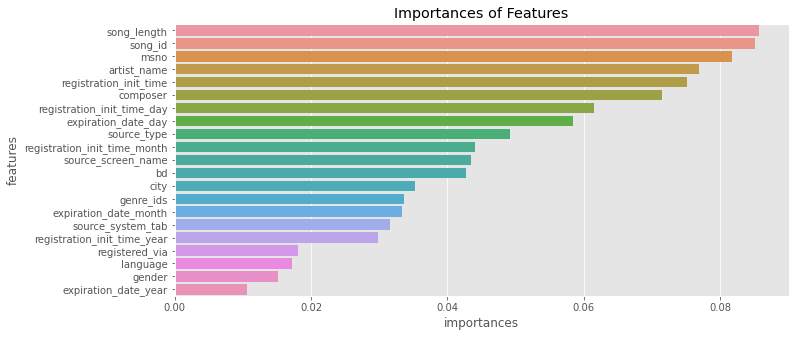

In [ ]:
train_plot = pd.DataFrame({'features': train.columns[train.columns != 'target'],
                        'importances': clf.feature_importances_})
train_plot = train_plot.sort_values('importances', ascending=False)

plt.figure(figsize=[11,5])
sns.barplot(x = train_plot.importances, y = train_plot.features)
plt.title('Importances of Features')
plt.show()

In [ ]:
train2=train.copy()

In [ ]:
# Drop columns with importances < 0.04
train2 = train2.drop(train_plot.features[train_plot.importances < 0.04].tolist(), 1)

# Selected columns
train2.columns

Index(['msno', 'song_id', 'source_screen_name', 'source_type', 'target',
       'song_length', 'artist_name', 'composer', 'bd',
       'registration_init_time', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [ ]:
# Train & Test split
train3=train.copy()

X_train1=train3.drop(['target'],axis=1).values
Y_train1=train3['target'].values

x_train,x_test,y_train,y_test=train_test_split(X_train1,Y_train1,test_size=0.25)

In [ ]:
# Create model
model2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5, n_estimators=250)
model2.fit(X_train1, Y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predicting
Prediction = model2.predict(x_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      9228
           1       0.96      0.99      0.98      9216

    accuracy                           0.97     18444
   macro avg       0.98      0.97      0.97     18444
weighted avg       0.98      0.97      0.97     18444



97% Accuracy recorded, It is highest using XGBoost